In [3]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 3.0 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.4/232.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
from nuprobe.inputs import NuSystem, create_U_PMNS, create_alpha
from nuprobe.probability import nuprobe

In [136]:
def run(m11, m21, m31):
    nu_sys = NuSystem(3)
    nu_sys.set_standard_normal()
    UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta)
    U1 = np.identity(3, dtype = complex)
    U1[0, 0] = m11
    U1[1, 0] = m21
    U1[2, 0] = m31
    U1[0, 1] = UPMNS[0, 1]
    U1[1, 1] = UPMNS[1, 1]
    U1[2, 1] = UPMNS[2, 1]
    U1[0, 2] = UPMNS[0, 2]
    U1[1, 2] = UPMNS[1, 2]
    U1[2, 2] = UPMNS[2, 2]

    PE = []
    PE1 = []
    num = 1000
    EE = np.logspace(0, 5, num)
    L = 1300

    for i in range(num):
        PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS, antinu=False, const_matter=True, V_NSI=None))
        PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, U1, antinu=False, const_matter=True, V_NSI=None))

    unitary = PE
    nonunitary = PE1
    
    
    
    return (unitary, nonunitary)

In [109]:
def get_chi_square(unitary, nonunitary, sigma):
    diff = [nonuni - uni for nonuni, uni in zip(unitary, nonunitary)]
    squared_diff = [d ** 2 for d in diff]
    squared_sd = [(sigma * uni) ** 2 for uni in unitary]
    cs = [sd / ssd for sd, ssd in zip(squared_diff, squared_sd)]
    chi_square_per_dof = sum(cs)/999
    return chi_square_per_dof

In [137]:
nu_sys = NuSystem(3) 
nu_sys.set_standard_normal() 
UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta) 
a = UPMNS[0, 0] 
b = UPMNS[1, 0] 
c = UPMNS[2, 0] 
[get_chi_square(unitary, nonunitary, 0.2) for (unitary, nonunitary) in [run(a, b, c)]]

[0.0]

In [14]:
nu_sys = NuSystem(3)
nu_sys.set_standard_normal()
UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta)
U1 = np.identity(3, dtype = complex)
U1[0, 0] = UPMNS[0, 0]
U1[1, 0] = UPMNS[1, 0]
U1[2, 0] = UPMNS[2, 0]
U1[0, 1] = UPMNS[0, 1]
U1[1, 1] = UPMNS[1, 1]
U1[2, 1] = UPMNS[2, 1]
U1[0, 2] = UPMNS[0, 2]
U1[1, 2] = UPMNS[1, 2]
U1[2, 2] = UPMNS[2, 2]
U1

array([[ 0.8251638 +0.j        ,  0.54487705+0.j        ,
        -0.14461681+0.03605107j],
       [-0.26870191+0.02277344j,  0.60559417+0.01503789j,
         0.74853872+0.j        ],
       [ 0.4959828 +0.01965758j, -0.57962925+0.01298041j,
         0.64612389+0.j        ]])

In [103]:
list_m11m21 = []
nu_sys = NuSystem(3)
nu_sys.set_standard_normal()
UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta)
a = UPMNS[0, 0]
b = UPMNS[1, 0]
c = UPMNS[2, 0]
for m11 in np.linspace(0.82511, 0.82525, 50):
    for m21 in np.linspace(-0.26995, -0.26965, 50):
        list_m11m21.append((m11*m11, m21*m21, run(m11, m21, c)))

In [106]:
list_m11m21_x = []
list_m11m21_y = []
for (x, y, (unitary, nonunitary)) in list_m11m21:
    if get_chi_square(unitary, nonunitary, 0.2) < 5.99:
        list_m11m21_x.append(x)
        list_m11m21_y.append(y)

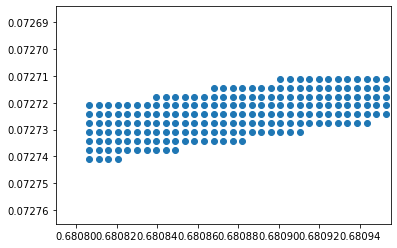

In [107]:
plt.xlim(0.8251*0.8251, 0.8252*0.8252)
plt.ylim(-0.26975*-0.26975, -0.2696 * -0.2696)
plt.scatter(list_m11m21_x, list_m11m21_y)